In [507]:
import Pkg
Pkg.activate("../../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [508]:
using Revise
using LinearAlgebra
using Distributions
using Random
using StatsPlots
using PDMats
using StatsBase
using Base.Iterators
using DataFrames, TimeSeries, XLSX
using PrettyTables

In [509]:
includet("../VARs/utils.jl")
includet("../VARs/VAR_OLS.jl")

In [510]:
df = DataFrame(XLSX.readtable("../../data/usa_macro_data.xlsx", "Quarterly", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :observation_date), Dates.year, first)

display(returns_summarystats(data_source, 1)) 

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA,15078.0,67981.0,39458.2,53692.0,17636.0,0.1715,26286.5,0.9585,-1.2503,2.6169,38905.0
GDPDEF,33.2392,124.163,55.5963,83.761,13.42,0.2226,20.5978,0.9569,-1.2157,1.6726,55.2795
TB3MS,3.169,14.39,4.1599,5.705,0.03,0.9892,1.75,0.8736,1.2373,1.3127,3.89
GS10,2.8998,14.29,5.4985,7.3125,1.32,0.9367,3.445,0.9292,0.5291,1.8961,4.725
Price_10Y,1696.97,5318.51,1572.47,2695.96,103.357,0.8485,165.936,0.9684,-0.7847,0.9266,695.429
Stock_Price,1144.93,5011.96,854.949,1283.92,24.84,1.8757,92.205,0.8853,3.1229,0.7467,287.45
Dividend,18.0439,70.6511,16.4021,22.2008,1.4167,1.5142,3.1125,0.9253,1.3575,0.909,9.4
E,46.9804,197.883,39.1208,55.4942,2.4567,1.6771,5.735,0.8617,2.3112,0.8327,16.3017
CAPE,8.1611,42.1856,20.7752,26.3734,7.1818,0.4615,15.1749,0.8962,-0.3087,2.5456,20.4852


nothing

In [ ]:
freq = 1

cpi = percentchange(data_source[:GDPDEF], :log) .* 100
gdp = percentchange(data_source[:A939RX0Q048SBEA], :log) .* 100
sr = (data_source[:TB3MS]) .- cpi
term = (data_source[:GS10]) .- (data_source[:TB3MS])
Δd = round.(percentchange(data_source[:Dividend], :log) .* 100, digits=2) .- cpi

dy = round.((log.(data_source[:Dividend]) .- log.(data_source[:Stock_Price])), digits=2)

data= merge(gdp, cpi, sr, term, Δd, dy)

start = Date(1985, 01,01)
end_d = Date(2024, 12, 31)
s_data = to(from(data, start),end_d)

display(returns_summarystats(s_data, freq)) 
display(cor(values(s_data)))



,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA,1.5016,3.5108,1.3358,2.0131,-4.1876,-1.8382,0.8396,0.2158,5.8468,0.8896,1.2775
GDPDEF,1.3238,6.7639,2.2664,2.4098,0.5552,2.0098,1.6169,0.5422,4.3981,1.7121,1.9438
TB3MS_GDPDEF,1.8457,2.8568,-0.6239,0.0464,-6.4539,-0.783,-1.3906,0.2915,2.7667,-0.3381,-0.5269
GS10_TB3MS,1.339,3.61,1.53,2.575,-1.07,-0.3461,0.2675,0.4958,-0.7455,1.1426,1.695
Dividend_GDPDEF,8.0088,14.4243,3.734,8.4612,-23.0452,-1.5815,0.4516,0.4114,3.2297,0.4662,5.8724
Dividend_Stock_Price,0.2071,-3.37,-4.01,-3.9175,-4.4,0.8249,-4.115,0.4075,2.184,-19.3614,-4.005


nothing

6×6 Matrix{Float64}:
  1.0        0.376157   -0.178064   -0.147199   0.251638   -0.651659
  0.376157   1.0        -0.369654   -0.410389   0.0724855  -0.474761
 -0.178064  -0.369654    1.0        -0.473524  -0.0158898  -0.103834
 -0.147199  -0.410389   -0.473524    1.0       -0.250718    0.292357
  0.251638   0.0724855  -0.0158898  -0.250718   1.0         0.149864
 -0.651659  -0.474761   -0.103834    0.292357   0.149864    1.0

In [549]:
s_data

24×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2001-01-01 to 2024-01-01
┌────────────┬─────────────────┬──────────┬──────────────┬────────────┬─────────
│            │ A939RX0Q048SBEA │ GDPDEF   │ TB3MS_GDPDEF │ GS10_TB3MS │ Divide ⋯
├────────────┼─────────────────┼──────────┼──────────────┼────────────┼─────────
│ 2001-01-01 │         1.16077 │   2.4005 │       2.4195 │       0.23 │        ⋯
│ 2002-01-01 │        0.359993 │  1.61913 │     0.100874 │       3.36 │        ⋯
│ 2003-01-01 │        0.737923 │  1.89328 │    -0.733276 │       2.76 │        ⋯
│ 2004-01-01 │         3.34595 │  2.23993 │     -1.31993 │        3.1 │        ⋯
│ 2005-01-01 │         2.90866 │  3.00455 │    -0.464553 │       1.76 │        ⋯
│ 2006-01-01 │         2.22383 │  3.14927 │      1.24073 │       0.18 │        ⋯
│ 2007-01-01 │        0.604429 │  2.86865 │      2.11135 │       -0.3 │        ⋯
│ 2008-01-01 │        0.427965 │  2.01174 │    0.0282601 │       1.62 │        ⋯
│     ⋮      │        ⋮        │  

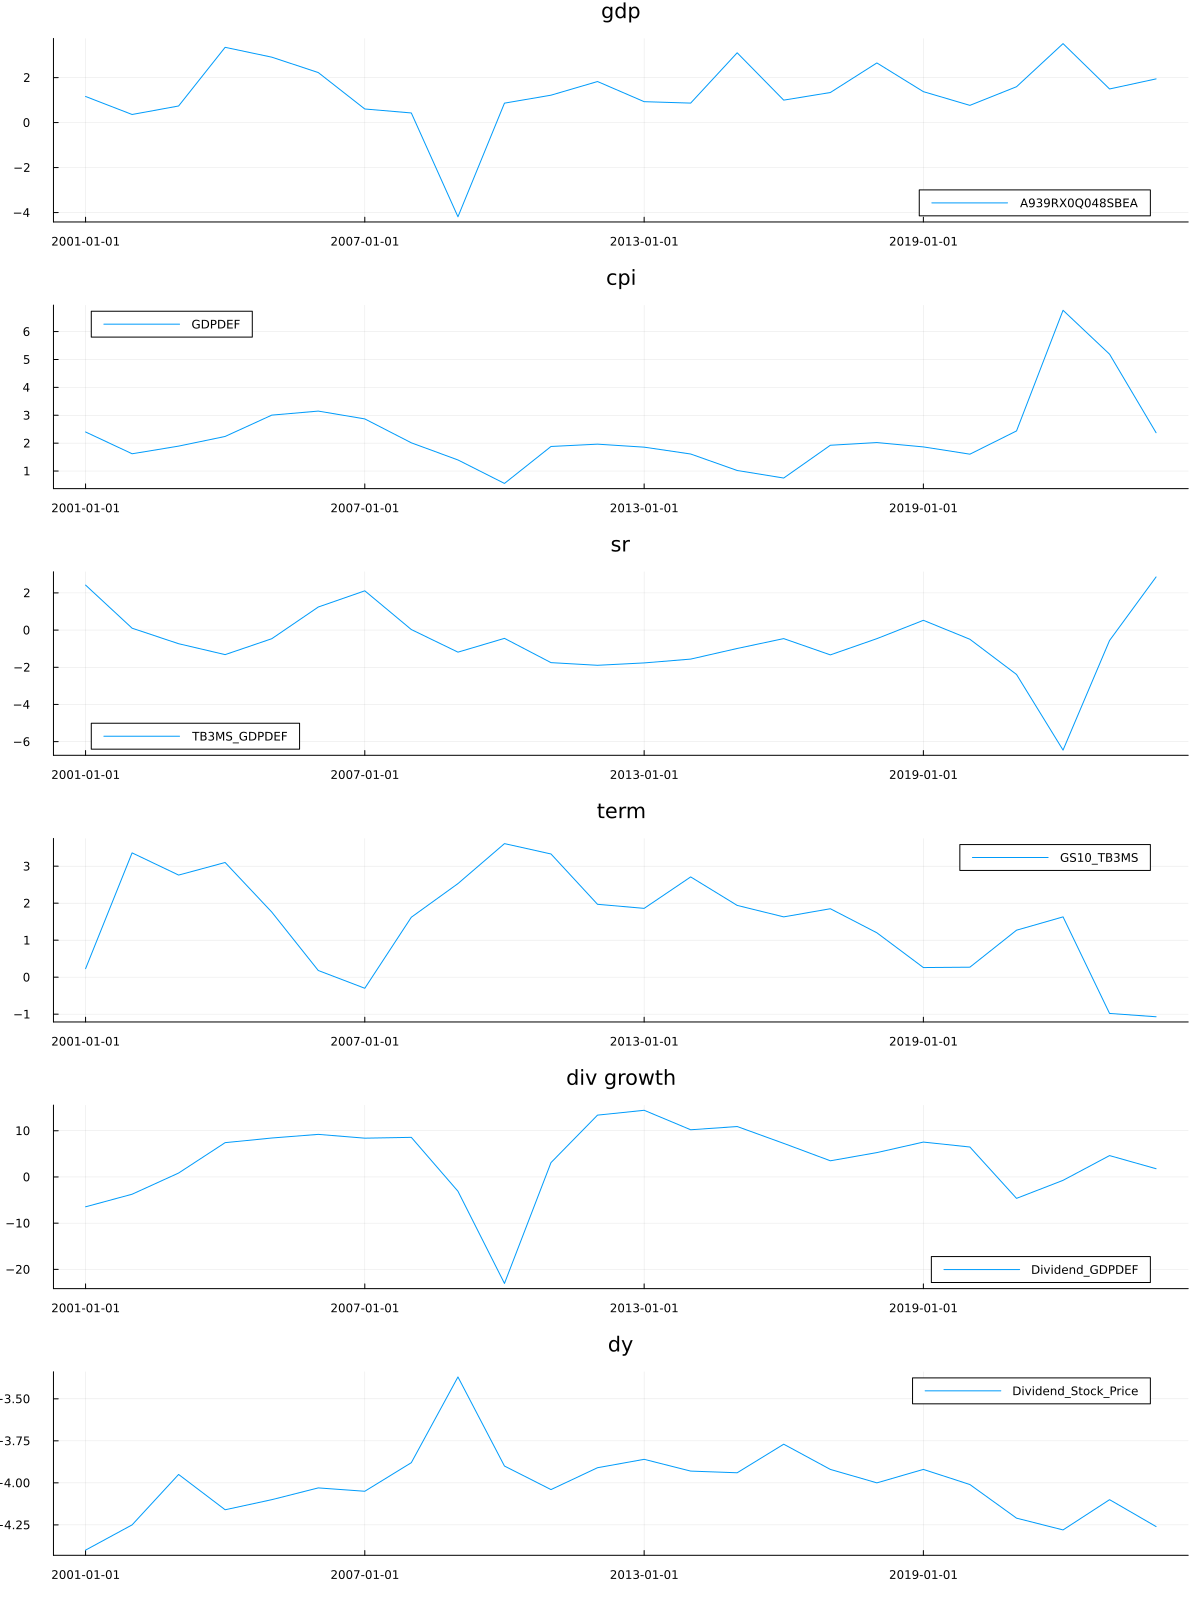

In [550]:
plot(s_data; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

In [551]:
assets_names = colnames(s_data)
T, n_assets = size(s_data)
model = VARModel(s_data)
model_summary(model)

,const,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price,std
A939RX0Q048SBEA,-4.2104,0.1067,-0.3338,-0.403,-0.1049,-0.0206,-1.5273,1.5788
GDPDEF,-9.2749,0.0292,-0.1382,-0.5258,-0.4508,-0.0414,-3.0759,0.9587
TB3MS_GDPDEF,23.3363,0.6133,1.7513,1.2557,0.8436,0.0108,7.3292,1.0001
GS10_TB3MS,-8.4812,-0.5641,-0.5075,0.0176,0.3783,0.0032,-2.8342,0.6728
Dividend_GDPDEF,0.9998,3.7971,0.4951,1.1664,2.5541,0.3316,1.8687,5.1045
Dividend_Stock_Price,-2.4935,0.0116,0.0314,0.0417,0.0813,0.0095,0.4309,0.1681


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
A939RX0Q048SBEA,1.0,0.24,0.12,-0.28,0.28,-0.89
GDPDEF,0.24,1.0,-0.74,-0.12,-0.03,-0.2
TB3MS_GDPDEF,0.12,-0.74,1.0,-0.28,-0.23,-0.19
GS10_TB3MS,-0.28,-0.12,-0.28,1.0,-0.03,0.17
Dividend_GDPDEF,0.28,-0.03,-0.23,-0.03,1.0,-0.14
Dividend_Stock_Price,-0.89,-0.2,-0.19,0.17,-0.14,1.0


In [552]:
scenarios = simulate(model, 25*freq, 10_000)
#periods = [2,6, 16, 26]
periods = [1,5, 15, 25]
ret_in_years = cum_returns_in_periods(scenarios, periods, freq, true)
print_scenarios_summary(ret_in_years, assets_names, string.(periods))

for a in 1:n_assets
    print_scenarios_percentiles(ret_in_years[a, :, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), string.(assets_names[a]))
end  

,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
1,1.9428,2.3732,2.8568,-1.07,1.7768,-4.26
5,1.4164,2.5984,-0.1468,1.0483,2.7013,-4.122
15,1.3398,2.3519,-0.5132,1.3646,3.6684,-4.036
25,1.3433,2.3491,-0.6243,1.4071,3.8002,-4.0237


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
1,0.0,0.0,0.0,0.0,0.0,0.0
5,0.6626,0.5568,0.6219,0.6135,3.9139,0.0863
15,0.42,0.4574,0.4435,0.4974,2.5039,0.0714
25,0.3284,0.3619,0.3415,0.3983,1.9615,0.0578


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
1,1.0,1.0,1.0,1.0,NaN,1.0
5,0.0155,0.0045,0.0239,0.0286,0.022,0.0179
15,0.0013,0.0151,0.01,-0.0168,-0.0072,-0.0248
25,0.005,0.0184,0.0119,-0.0082,-0.0065,-0.0261


,A939RX0Q048SBEA,GDPDEF,TB3MS_GDPDEF,GS10_TB3MS,Dividend_GDPDEF,Dividend_Stock_Price
1,-2.0,-2.0,-2.0,-2.0,NaN,-2.0
5,0.142,-0.0284,-0.0426,-0.0625,0.0586,0.0841
15,-0.0152,0.0063,-0.0335,0.0525,-0.032,0.055
25,-0.0294,-0.0431,0.0305,-0.0204,-0.0133,-0.0324


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,1.9428,1.9428,1.9428,1.9428,1.9428,1.9428,1.9428,1.9428,1.9428
5,-0.1371,0.1035,0.3135,0.9764,1.4204,1.8505,2.5134,2.7069,2.954
15,0.3578,0.5104,0.6404,1.0549,1.3407,1.6221,2.0326,2.1685,2.3247
25,0.5819,0.7004,0.8029,1.1206,1.3391,1.5699,1.8873,1.9869,2.1069


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.3732,2.3732,2.3732,2.3732,2.3732,2.3732,2.3732,2.3732,2.3732
5,1.3335,1.5119,1.6877,2.2218,2.5975,2.9743,3.5269,3.6925,3.8988
15,1.2932,1.4628,1.6052,2.0463,2.35,2.653,3.1091,3.2503,3.4366
25,1.5182,1.6447,1.7586,2.0995,2.3481,2.594,2.9504,3.0567,3.18


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.8568,2.8568,2.8568,2.8568,2.8568,2.8568,2.8568,2.8568,2.8568
5,-1.5742,-1.3565,-1.1601,-0.5642,-0.1541,0.2755,0.8736,1.0933,1.3041
15,-1.5282,-1.3754,-1.2353,-0.8106,-0.5137,-0.2112,0.2116,0.3542,0.5304
25,-1.4191,-1.2935,-1.1853,-0.8542,-0.6278,-0.3924,-0.0695,0.0345,0.1746


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07
5,-0.3741,-0.1484,0.0472,0.6275,1.0453,1.4616,2.0677,2.2415,2.4552
15,0.1959,0.3902,0.5568,1.0318,1.3655,1.7017,2.182,2.3508,2.5264
25,0.4889,0.6209,0.7483,1.1391,1.4069,1.6801,2.0595,2.1816,2.3165


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,1.7768,1.7768,1.7768,1.7768,1.7768,1.7768,1.7768,1.7768,1.7768
5,-6.2873,-4.9259,-3.77,0.0769,2.7065,5.3223,9.2141,10.3899,11.8613
15,-2.2011,-1.1995,-0.4562,1.9836,3.6604,5.3709,7.8282,8.6139,9.498
25,-0.6976,-0.0372,0.5579,2.4824,3.8009,5.1192,7.0084,7.7075,8.3975


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26
5,-4.3245,-4.2897,-4.2636,-4.1796,-4.1227,-4.064,-3.9802,-3.9493,-3.9153
15,-4.2071,-4.1784,-4.1532,-4.083,-4.0357,-3.9877,-3.9189,-3.8981,-3.87
25,-4.1592,-4.1383,-4.1197,-4.0626,-4.0232,-3.9846,-3.9289,-3.9129,-3.8923


In [553]:
sr = scenarios[2, :,:] + scenarios[3, :,:] 
lr = scenarios[2, :,:] + scenarios[3, :,:] + scenarios[4, :,:] 
real_Δd = scenarios[2, :,:] + scenarios[5, :,:]
dy = exp.(scenarios[6, :,:])



print_scenarios_percentiles(sr[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "sr")
print_scenarios_percentiles(lr[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "lr")
print_scenarios_percentiles(cumsum(real_Δd, dims=1)[periods,:] ./ (periods.-1), [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "Δd")
print_scenarios_percentiles(dy[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "dy")



,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,5.23,5.23,5.23,5.23,5.23,5.23,5.23,5.23,5.23
5,-2.0615,-1.398,-0.8491,0.8907,2.0339,3.244,4.9571,5.5244,6.0638
15,-3.1366,-2.3972,-1.7647,0.1493,1.5282,2.8641,4.8423,5.4273,6.1521
25,-3.235,-2.3821,-1.6962,0.231,1.5528,2.8754,4.8059,5.355,6.0537


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,4.16,4.16,4.16,4.16,4.16,4.16,4.16,4.16,4.16
5,0.726,1.1562,1.4947,2.597,3.3555,4.125,5.2198,5.5948,5.9646
15,0.1963,0.6439,1.015,2.1792,2.9992,3.8373,5.0076,5.4189,5.8783
25,0.164,0.6577,1.0592,2.2222,3.024,3.8394,5.0024,5.3784,5.7948


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
5,-4.6327,-3.056,-1.4865,3.316,6.6509,9.9232,14.8395,16.3813,18.265
15,0.1521,1.1386,1.9785,4.6255,6.4318,8.2769,10.9294,11.7987,12.7759
25,1.6744,2.3136,2.968,5.0168,6.4077,7.8068,9.8169,10.4869,11.2755


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141
5,0.0113,0.0122,0.013,0.0159,0.0182,0.0208,0.0251,0.0267,0.0288
15,0.0109,0.0119,0.0128,0.0158,0.0182,0.0211,0.026,0.0277,0.0302
25,0.011,0.012,0.0128,0.0158,0.0182,0.0211,0.026,0.0277,0.0302


In [554]:
real_Δd[1,:] .= 1.

div_index =values(data_source[:Dividend][end])[1] .* exp.(cumsum(real_Δd, dims=1) ./100)
price_index = div_index ./ dy
periods = [1, 5, 10, 25] * freq

eq_ret = log.((price_index[2:end,:] .+ div_index[2:end,:] ) ./ price_index[1:end-1,:])
eq_cum_ret = cumsum(eq_ret, dims=1)[periods,:] ./ periods
real_eq_ret = eq_ret .- (scenarios[2, 2:end, :] ./100)
real_eq_cum_ret = cumsum(real_eq_ret, dims=1)[periods,:] ./ periods

print_scenarios_percentiles(eq_cum_ret, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity return")
print_scenarios_percentiles(real_eq_cum_ret, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity real return")

,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.4253,-0.3599,-0.3115,-0.1321,-0.0094,0.1094,0.2883,0.3445,0.4138
5,-0.1116,-0.0897,-0.073,-0.0165,0.0219,0.0619,0.1177,0.1344,0.1524
10,-0.0383,-0.0254,-0.0132,0.0253,0.0515,0.0766,0.1161,0.1286,0.1423
25,0.0208,0.0282,0.0352,0.0556,0.0703,0.0853,0.106,0.1131,0.1212


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.446,-0.381,-0.3306,-0.1552,-0.0333,0.0841,0.2613,0.3127,0.3834
5,-0.1333,-0.1113,-0.0953,-0.0412,-0.0035,0.0348,0.0897,0.1048,0.1225
10,-0.0605,-0.0466,-0.0354,0.0023,0.0278,0.0526,0.0907,0.1028,0.1164
25,-0.0019,0.0053,0.0122,0.0323,0.0467,0.0615,0.0824,0.0889,0.097


In [555]:
mdd, mddl = max_drawdown_and_length(real_eq_ret)

display("real equity")
display("mdd")
display(quantile(mdd, [.03, .25, .5, .75, .97])')
display("mddl")
display(quantile(mddl, [.03, .25, .5, .75, .97])')

"real equity"

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.222808  0.323126  0.384701  0.451747  0.587348

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 4.0  6.0  8.0  10.0  16.0

In [556]:
eq_return = calculate_equity_returns(real_Δd, scenarios[6, :,:])
eq_cum_return = cumsum(eq_return, dims=1)[periods,:] ./ periods

print_scenarios_percentiles(eq_cum_return, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity return")

,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.4253,-0.3599,-0.3115,-0.1321,-0.0094,0.1094,0.2883,0.3445,0.4138
5,-0.1116,-0.0897,-0.073,-0.0165,0.0219,0.0619,0.1177,0.1344,0.1524
10,-0.0383,-0.0254,-0.0132,0.0253,0.0515,0.0766,0.1161,0.1286,0.1423
25,0.0208,0.0282,0.0352,0.0556,0.0703,0.0853,0.106,0.1131,0.1212


In [557]:
percentile(eq_return[1,:], [.25, .5, .75])

3-element Vector{Float64}:
 -0.5116277148131649
 -0.4667986334893008
 -0.4440296678746254

In [558]:
bond_returns = calculate_bond_returns(lr./100, 10, 1)
bond_cum_returns = cumsum(bond_returns, dims=1)[periods,:] ./ periods

real_bond_returns = bond_returns .- (scenarios[2, 2:end, :] ./100)
real_bond_cum_returns = cumsum(real_bond_returns, dims=1)[periods,:] ./ periods

print_scenarios_percentiles(bond_cum_returns, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "bonds returns")
print_scenarios_percentiles(real_bond_cum_returns, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "real bonds returns")


mdd, mddl = max_drawdown_and_length(real_bond_returns)

display("real bonds")
display("mdd")
display(quantile(mdd, [.03, .25, .5, .75, .97])')
display("mddl")
display(quantile(mddl, [.03, .25, .5, .75, .97])')


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.0237,-0.0056,0.0075,0.0536,0.0869,0.1215,0.1716,0.1895,0.21
5,0.0147,0.0194,0.0237,0.038,0.0483,0.0591,0.0758,0.0818,0.0885
10,0.0211,0.0245,0.0274,0.0366,0.043,0.05,0.0602,0.0636,0.0677
25,0.0251,0.0266,0.0281,0.0327,0.036,0.0394,0.0445,0.0462,0.0481


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.0538,-0.0365,-0.0221,0.0268,0.0624,0.0993,0.1507,0.1696,0.1916
5,-0.0205,-0.0138,-0.0086,0.0096,0.0225,0.0362,0.0561,0.0635,0.0717
10,-0.0109,-0.0064,-0.0021,0.0106,0.0194,0.0285,0.0424,0.0469,0.0527
25,-0.0036,-0.001,0.0009,0.0078,0.0126,0.0174,0.0245,0.0268,0.0294


"real bonds"

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.133688  0.211335  0.263888  0.321842  0.432141

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 6.0  9.0  11.0  15.0  21.0

In [559]:
B = collect(model.C[2:end,:]')

resp = girf(B, model.Σ, 10, 6, 1)



11×6 Matrix{Float64}:
 -1.40956     -0.194968     -0.193408    0.115515    -0.739853    0.168077
 -0.261       -0.451012     -0.127503    0.455694    -5.31063     0.0442706
  0.168095    -0.0001236    -0.458614    0.40375     -1.87766    -0.0169999
  0.225106     0.19403      -0.27731     0.0920347    0.480013   -0.00959322
  0.0661183    0.0937265     0.142173   -0.166806     1.00368     0.00505066
 -0.0924234   -0.0676378     0.290379   -0.156554     0.379553    0.00782083
 -0.107652    -0.115215      0.118848    0.0114164   -0.305082    0.00318087
 -0.0206941   -0.0520194    -0.0889203   0.115623    -0.393254   -0.000514745
  0.0477522    0.0190676    -0.125937    0.080442    -0.0441209  -0.000152856
  0.0421891    0.0310075    -0.0291936  -0.00811428   0.234401    0.00195097
 -0.00104091   0.000255492   0.0535112  -0.0478982    0.202153    0.00265958

In [560]:
resp[2,2] + resp[2,3]  + resp[2,4]

-0.12282084045033348

gdp + 
- sr .42
- lr .25

gdp -
- sr - .42
- lr - .25

cpi +
- sr .09
- lr .2


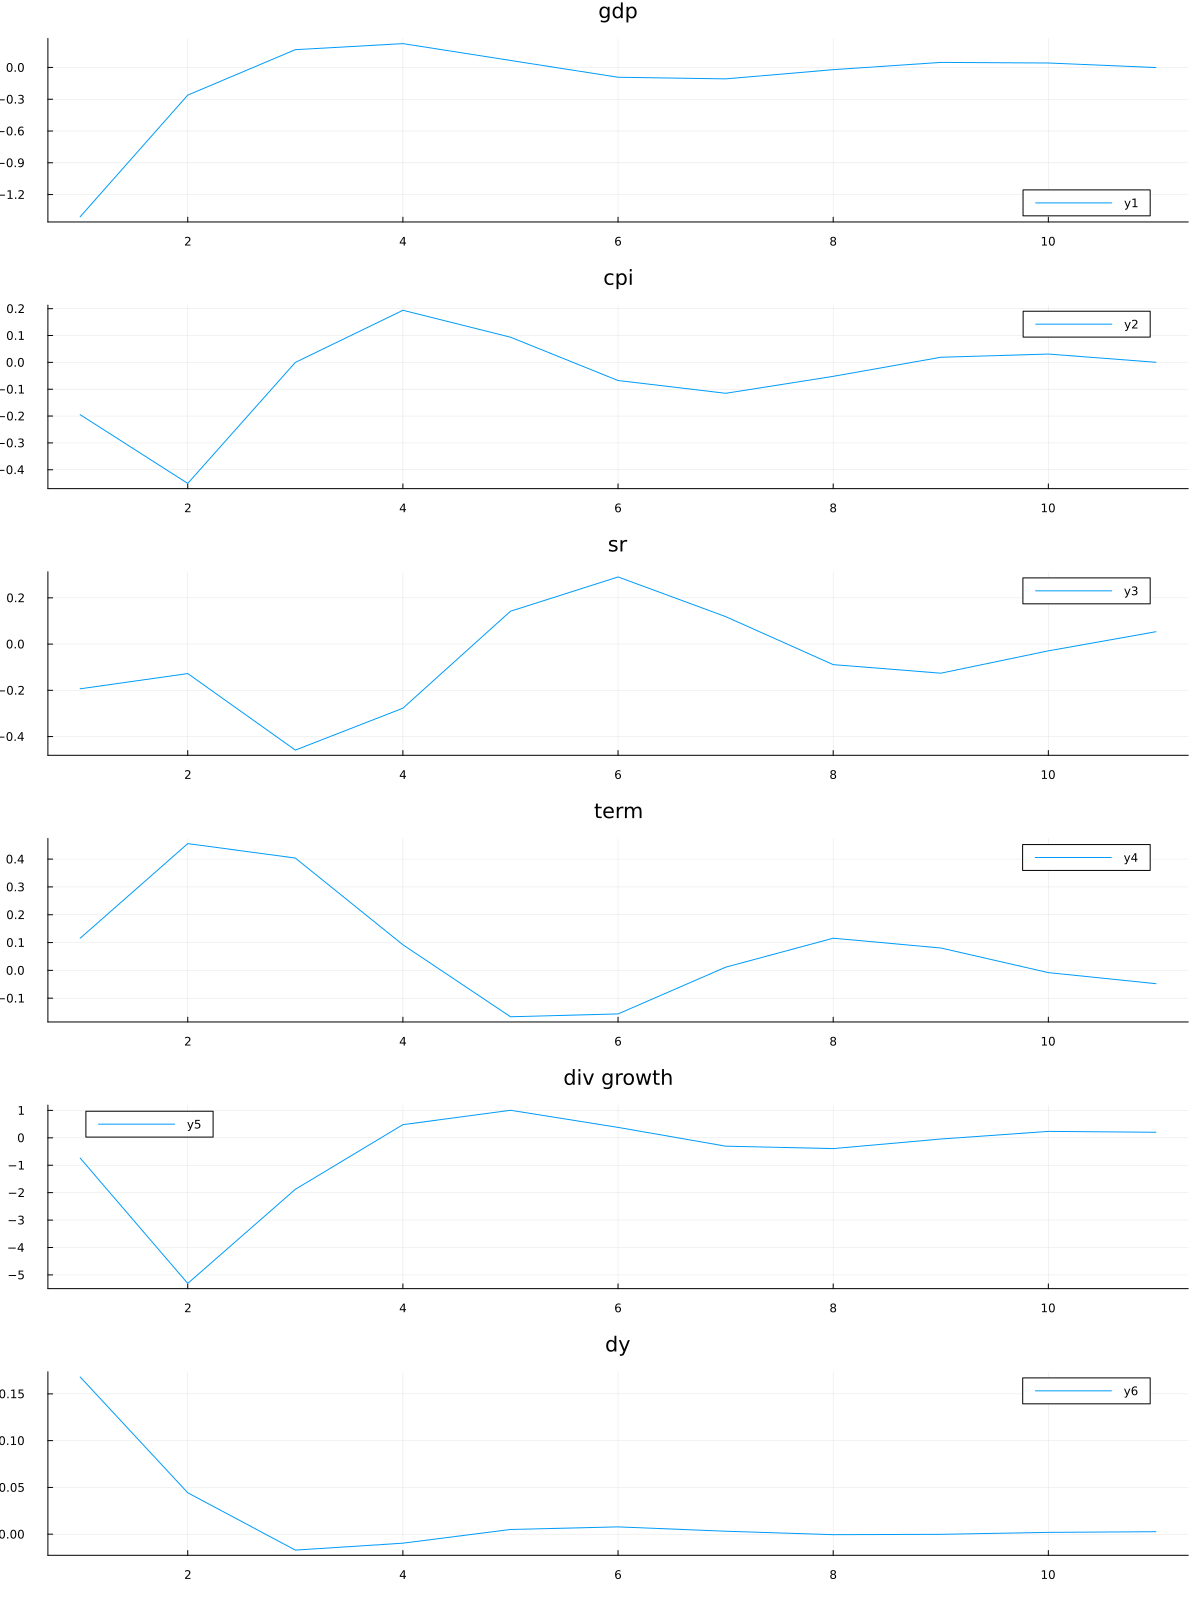

In [561]:
plot(resp; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

In [562]:
display(exp(-3.8 ) *100) 
display(exp(-3.8 + 0.08)*100) 
display((exp(-3.8 ) - exp(-3.8 + 0.08))*100) 
display(0.0224*exp((0.06^2)-1)^.5 *100)
display(exp(-4.8 ) *100) 

2.23707718561656

2.4233967845691122

-0.1863195989525522

1.3610764116758998

0.822974704902003

IRF returns
- estimate dy, and div idnex, based on initial value, mean?
- estimate returns?
- 

In [563]:
resp

11×6 Matrix{Float64}:
 -1.40956     -0.194968     -0.193408    0.115515    -0.739853    0.168077
 -0.261       -0.451012     -0.127503    0.455694    -5.31063     0.0442706
  0.168095    -0.0001236    -0.458614    0.40375     -1.87766    -0.0169999
  0.225106     0.19403      -0.27731     0.0920347    0.480013   -0.00959322
  0.0661183    0.0937265     0.142173   -0.166806     1.00368     0.00505066
 -0.0924234   -0.0676378     0.290379   -0.156554     0.379553    0.00782083
 -0.107652    -0.115215      0.118848    0.0114164   -0.305082    0.00318087
 -0.0206941   -0.0520194    -0.0889203   0.115623    -0.393254   -0.000514745
  0.0477522    0.0190676    -0.125937    0.080442    -0.0441209  -0.000152856
  0.0421891    0.0310075    -0.0291936  -0.00811428   0.234401    0.00195097
 -0.00104091   0.000255492   0.0535112  -0.0478982    0.202153    0.00265958

In [564]:
real_Δd = resp[:,2] + resp[:,5]




11-element Vector{Float64}:
 -0.934821304442061
 -5.761647018959759
 -1.8777812766049815
  0.6740423334651515
  1.0974016930866541
  0.31191532758721635
 -0.4202964890831895
 -0.4452736401967927
 -0.02505335009207915
  0.2654086557263483
  0.20240870076129597

In [565]:
dy = exp.(scenarios[6, :,:])

26×10000 Matrix{Float64}:
 0.0141223  0.0141223  0.0141223  …  0.0141223   0.0141223  0.0141223
 0.0173325  0.0141117  0.0162058     0.0197352   0.0141879  0.013838
 0.0223882  0.0145251  0.01816       0.0153127   0.0122196  0.0151601
 0.0179895  0.015015   0.0190816     0.0134275   0.017318   0.0191745
 0.0137033  0.0214005  0.022558      0.00923705  0.0201975  0.0187387
 0.0177325  0.0159377  0.0238893  …  0.0137113   0.0175749  0.0136078
 0.019271   0.0147776  0.018571      0.019549    0.0204739  0.0164153
 0.0207694  0.0186275  0.0175326     0.0227239   0.0206587  0.0197893
 0.0224358  0.0234028  0.0170381     0.0181783   0.0171926  0.0212784
 0.0189392  0.01857    0.0180184     0.013643    0.0174914  0.0173872
 ⋮                                ⋱                         
 0.0190905  0.0167521  0.022746      0.015444    0.0189328  0.0171564
 0.0205345  0.0151894  0.0171582     0.0197068   0.0210092  0.0107707
 0.0248054  0.0148036  0.0183304     0.0191753   0.0246798  0.0102061
 0.0